In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
# Load the datasets
white_wine = pd.read_csv('/content/winequality-white.csv')
red_wine = pd.read_csv('/content/winequality-red.csv')

# Display the first few rows of the datasets
white_wine.head(), red_wine.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  
 1      9.5        6  
 2 

MATRIX OPERATIONS (addition, subtraction, multiplication, and finding the rank of a matrix.)

In [8]:
# Select a subset of the data (first 5 rows and first 5 columns)
subset_white = white_wine.iloc[:5, :5].values
subset_red = red_wine.iloc[:5, :5].values

# Matrix addition
addition_result = subset_white + subset_red

# Matrix subtraction
subtraction_result = subset_white - subset_red

# Matrix multiplication
multiplication_result = np.dot(subset_white, subset_red.T)

# Rank of the matrix
rank_white = np.linalg.matrix_rank(subset_white)
rank_red = np.linalg.matrix_rank(subset_red)

addition_result, subtraction_result, multiplication_result, rank_white, rank_red

(array([[14.4  ,  0.97 ,  0.36 , 22.6  ,  0.121],
        [14.1  ,  1.18 ,  0.34 ,  4.2  ,  0.147],
        [15.9  ,  1.04 ,  0.44 ,  9.2  ,  0.142],
        [18.4  ,  0.51 ,  0.88 , 10.4  ,  0.133],
        [14.6  ,  0.93 ,  0.32 , 10.4  ,  0.134]]),
 array([[-4.00e-01, -4.30e-01,  3.60e-01,  1.88e+01, -3.10e-02],
        [-1.50e+00, -5.80e-01,  3.40e-01, -1.00e+00, -4.90e-02],
        [ 3.00e-01, -4.80e-01,  3.60e-01,  4.60e+00, -4.20e-02],
        [-4.00e+00, -5.00e-02, -2.40e-01,  6.60e+00, -1.70e-02],
        [-2.00e-01, -4.70e-01,  3.20e-01,  6.60e+00, -1.80e-02]]),
 array([[ 91.32242 , 108.66201 , 102.43374 , 118.010575,  91.32242 ],
        [ 49.873724,  53.568802,  53.066108,  73.878075,  49.873724],
        [ 73.2498  ,  81.3713  ,  79.2834  , 104.13615 ,  73.2498  ],
        [ 69.595408,  78.468084,  75.902936,  97.03795 ,  69.595408],
        [ 69.595408,  78.468084,  75.902936,  97.03795 ,  69.595408]]),
 4,
 4)

Covariance Matrix Determinant and Significance

In [9]:
# Compute the covariance matrix
cov_matrix_white = np.cov(white_wine, rowvar=False)
cov_matrix_red = np.cov(red_wine, rowvar=False)

# Compute the determinant of the covariance matrix
determinant_white = np.linalg.det(cov_matrix_white)
determinant_red = np.linalg.det(cov_matrix_red)

determinant_white, determinant_red

(9.583504951392421e-12, 1.4505974593131714e-11)

Diagonalization of the Covariance Matrix

In [10]:
# Diagonalize the covariance matrix
eigvals_white, eigvecs_white = np.linalg.eig(cov_matrix_white)
eigvals_red, eigvecs_red = np.linalg.eig(cov_matrix_red)

# Interpret the results (eigenvalues and eigenvectors)
eigvals_white, eigvecs_white, eigvals_red, eigvecs_red

(array([1.93153409e+03, 1.68473166e+02, 2.15628867e+01, 1.31617443e+00,
        6.86711335e-01, 5.00409212e-01, 1.83893681e-02, 1.41162502e-02,
        1.14461035e-02, 8.20647606e-03, 3.95835170e-04, 3.12864643e-07]),
 array([[-1.54452453e-03, -9.16673296e-03,  1.29244578e-02,
          1.24422410e-01,  9.84530707e-01,  8.49236772e-02,
          7.43389867e-02, -4.68562413e-02, -4.96968204e-03,
         -8.57816708e-04,  2.24739551e-03,  7.66601528e-04],
        [-1.69030937e-04, -1.54624759e-03,  9.34397864e-04,
         -5.04641601e-03, -3.84971566e-03, -4.09544532e-02,
         -7.19119916e-02, -2.83221670e-01,  1.62429207e-01,
         -9.41218753e-01, -2.48414077e-02,  4.69700074e-04],
        [-3.38646756e-04,  1.40367326e-04,  1.25792693e-03,
          2.93863262e-03,  4.16636471e-02,  8.27487507e-03,
         -4.03006772e-02,  8.76795979e-01, -3.52074313e-01,
         -3.21480015e-01, -2.20033151e-02,  3.37124552e-04],
        [-4.73275083e-02,  1.49314295e-02,  9.95132094e-01,

In [11]:
# Diagonalize the covariance matrix
eigvals_white, eigvecs_white = np.linalg.eig(cov_matrix_white)
eigvals_red, eigvecs_red = np.linalg.eig(cov_matrix_red)

# Interpret the results (eigenvalues and eigenvectors)
eigvals_white, eigvecs_white, eigvals_red, eigvecs_red

(array([1.93153409e+03, 1.68473166e+02, 2.15628867e+01, 1.31617443e+00,
        6.86711335e-01, 5.00409212e-01, 1.83893681e-02, 1.41162502e-02,
        1.14461035e-02, 8.20647606e-03, 3.95835170e-04, 3.12864643e-07]),
 array([[-1.54452453e-03, -9.16673296e-03,  1.29244578e-02,
          1.24422410e-01,  9.84530707e-01,  8.49236772e-02,
          7.43389867e-02, -4.68562413e-02, -4.96968204e-03,
         -8.57816708e-04,  2.24739551e-03,  7.66601528e-04],
        [-1.69030937e-04, -1.54624759e-03,  9.34397864e-04,
         -5.04641601e-03, -3.84971566e-03, -4.09544532e-02,
         -7.19119916e-02, -2.83221670e-01,  1.62429207e-01,
         -9.41218753e-01, -2.48414077e-02,  4.69700074e-04],
        [-3.38646756e-04,  1.40367326e-04,  1.25792693e-03,
          2.93863262e-03,  4.16636471e-02,  8.27487507e-03,
         -4.03006772e-02,  8.76795979e-01, -3.52074313e-01,
         -3.21480015e-01, -2.20033151e-02,  3.37124552e-04],
        [-4.73275083e-02,  1.49314295e-02,  9.95132094e-01,

In [12]:
# Compute the eigenvalues and eigenvectors
eigvals_white, eigvecs_white = np.linalg.eig(cov_matrix_white)
eigvals_red, eigvecs_red = np.linalg.eig(cov_matrix_red)

# Display the results
print("Eigenvalues of the white wine covariance matrix:\n", eigvals_white)
print("Eigenvectors of the white wine covariance matrix:\n", eigvecs_white)

print("Eigenvalues of the red wine covariance matrix:\n", eigvals_red)
print("Eigenvectors of the red wine covariance matrix:\n", eigvecs_red)

Eigenvalues of the white wine covariance matrix:
 [1.93153409e+03 1.68473166e+02 2.15628867e+01 1.31617443e+00
 6.86711335e-01 5.00409212e-01 1.83893681e-02 1.41162502e-02
 1.14461035e-02 8.20647606e-03 3.95835170e-04 3.12864643e-07]
Eigenvectors of the white wine covariance matrix:
 [[-1.54452453e-03 -9.16673296e-03  1.29244578e-02  1.24422410e-01
   9.84530707e-01  8.49236772e-02  7.43389867e-02 -4.68562413e-02
  -4.96968204e-03 -8.57816708e-04  2.24739551e-03  7.66601528e-04]
 [-1.69030937e-04 -1.54624759e-03  9.34397864e-04 -5.04641601e-03
  -3.84971566e-03 -4.09544532e-02 -7.19119916e-02 -2.83221670e-01
   1.62429207e-01 -9.41218753e-01 -2.48414077e-02  4.69700074e-04]
 [-3.38646756e-04  1.40367326e-04  1.25792693e-03  2.93863262e-03
   4.16636471e-02  8.27487507e-03 -4.03006772e-02  8.76795979e-01
  -3.52074313e-01 -3.21480015e-01 -2.20033151e-02  3.37124552e-04]
 [-4.73275083e-02  1.49314295e-02  9.95132094e-01 -7.59758326e-02
  -5.94915363e-04 -3.78225593e-02  6.29485032e-03  3

Principal Component Analysis (PCA

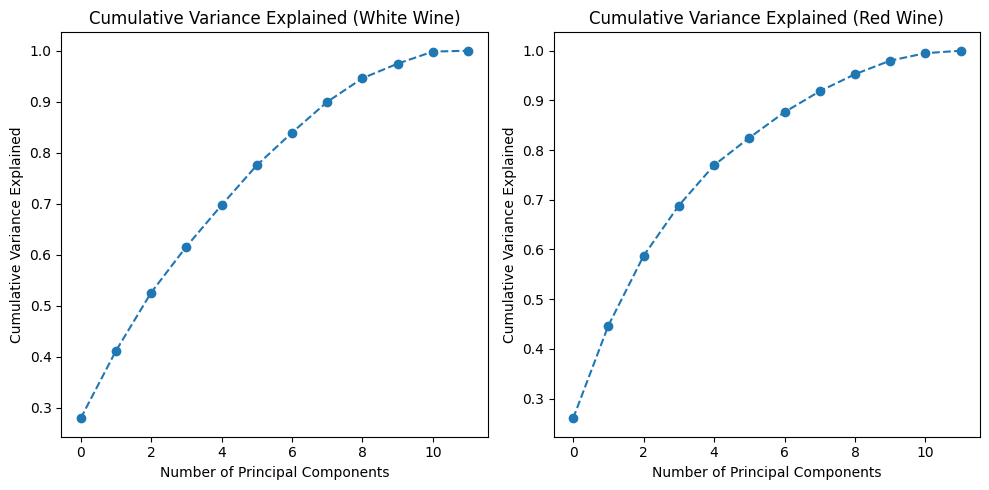

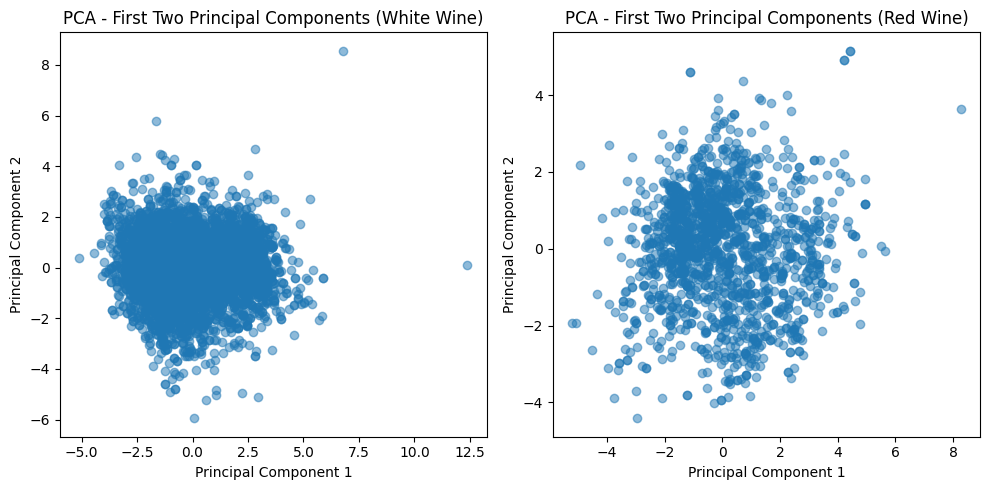

Variance explained by each principal component (White Wine):
 [0.27888907 0.13217419 0.11426434 0.09040513 0.08127361 0.07823025
 0.06410402 0.06032448 0.04637509 0.02857778 0.02367628 0.00170576]
Variance explained by each principal component (Red Wine):
 [0.26009731 0.1868235  0.14024331 0.10125174 0.0811053  0.05521602
 0.05152648 0.04215605 0.03427563 0.02732662 0.01501822 0.00495983]


In [15]:
# Convert all columns to numeric, filling NaN values with column means
white_wine_numeric = white_wine.apply(pd.to_numeric, errors='coerce').fillna(white_wine.mean())
red_wine_numeric = red_wine.apply(pd.to_numeric, errors='coerce').fillna(red_wine.mean())

# Standardize the data
scaler_white = StandardScaler()
scaler_red = StandardScaler()

white_wine_scaled = scaler_white.fit_transform(white_wine_numeric)
red_wine_scaled = scaler_red.fit_transform(red_wine_numeric)

# Apply PCA
pca_white = PCA()
pca_red = PCA()

white_wine_pca = pca_white.fit_transform(white_wine_scaled)
red_wine_pca = pca_red.fit_transform(red_wine_scaled)

# Variance explained by each principal component
explained_variance_white = pca_white.explained_variance_ratio_
explained_variance_red = pca_red.explained_variance_ratio_

# Cumulative variance
cumulative_variance_white = np.cumsum(explained_variance_white)
cumulative_variance_red = np.cumsum(explained_variance_red)

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(cumulative_variance_white, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained (White Wine)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance_red, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained (Red Wine)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

# Visualize the first two principal components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(white_wine_pca[:, 0], white_wine_pca[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components (White Wine)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(red_wine_pca[:, 0], red_wine_pca[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components (Red Wine)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Print the variance explained by each principal component
print("Variance explained by each principal component (White Wine):\n", explained_variance_white)
print("Variance explained by each principal component (Red Wine):\n", explained_variance_red)

Single Value Decomposition (SVD): Perform SVD on the dataset and explain how it can be used for data compression and noise reduction.

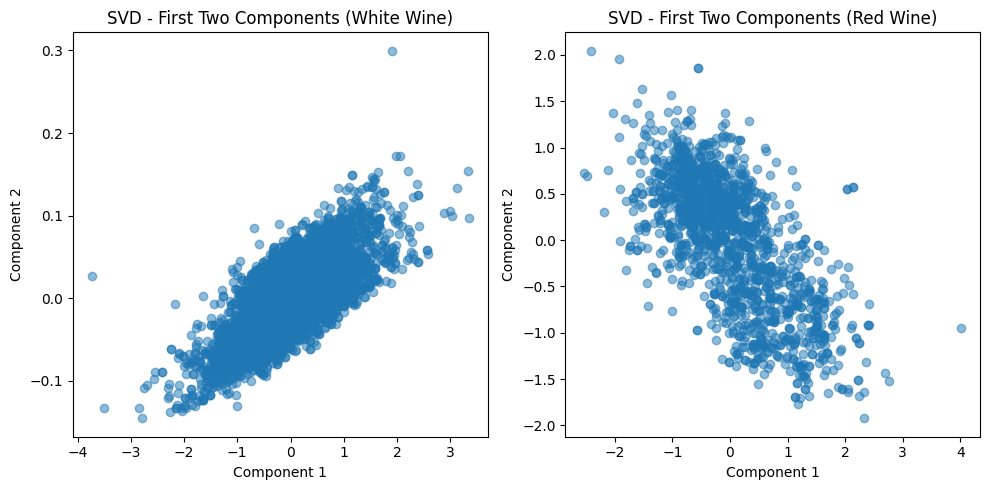

In [16]:
# Perform SVD on the standardized datasets
U_white, S_white, VT_white = np.linalg.svd(white_wine_scaled, full_matrices=False)
U_red, S_red, VT_red = np.linalg.svd(red_wine_scaled, full_matrices=False)

# Choose the number of singular values to retain (for example, top 2 for visualization)
k = 2

# Reconstruct the datasets using only the top k singular values
white_wine_compressed = np.dot(U_white[:, :k], np.dot(np.diag(S_white[:k]), VT_white[:k, :]))
red_wine_compressed = np.dot(U_red[:, :k], np.dot(np.diag(S_red[:k]), VT_red[:k, :]))

# Print shapes to verify the dimensions after compression
white_wine_compressed.shape, red_wine_compressed.shape

# Visualize the compressed datasets in the reduced-dimensional space
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(white_wine_compressed[:, 0], white_wine_compressed[:, 1], alpha=0.5)
plt.title('SVD - First Two Components (White Wine)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(1, 2, 2)
plt.scatter(red_wine_compressed[:, 0], red_wine_compressed[:, 1], alpha=0.5)
plt.title('SVD - First Two Components (Red Wine)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


Solve a system of linear equations derived from the dataset using LU Decomposition and Gaussian Elimination. Discuss the stability and efficiency of these methods.

In [17]:
from scipy.linalg import lu, lu_solve, lu_factor

# Extract a small subset (first 3 rows and first 3 columns)
A_white = white_wine_numeric.iloc[:3, :3].values
b_white = white_wine_numeric.iloc[:3, 3].values

A_red = red_wine_numeric.iloc[:3, :3].values
b_red = red_wine_numeric.iloc[:3, 3].values

# LU Decomposition for white wine dataset
lu_piv_white = lu_factor(A_white)
x_lu_white = lu_solve(lu_piv_white, b_white)

# LU Decomposition for red wine dataset
lu_piv_red = lu_factor(A_red)
x_lu_red = lu_solve(lu_piv_red, b_red)

# Gaussian Elimination function
def gaussian_elimination(A, b):
    n = len(b)
    # Forward elimination
    for i in range(n):
        # Make the diagonal contain all 1's
        factor = A[i][i]
        for j in range(i, n):
            A[i][j] /= factor
        b[i] /= factor

        # Make the other rows contain 0's
        for k in range(i+1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]

    # Backward substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = b[i]
        for j in range(i+1, n):
            x[i] -= A[i][j] * x[j]
    return x

# Gaussian Elimination for white wine dataset
x_ge_white = gaussian_elimination(A_white.copy(), b_white.copy())

# Gaussian Elimination for red wine dataset
x_ge_red = gaussian_elimination(A_red.copy(), b_red.copy())

# Display the results
{
    "LU Decomposition Solution (White Wine)": x_lu_white,
    "Gaussian Elimination Solution (White Wine)": x_ge_white,
    "LU Decomposition Solution (Red Wine)": x_lu_red,
    "Gaussian Elimination Solution (Red Wine)": x_ge_red
}


{'LU Decomposition Solution (White Wine)': array([ -130.89261745, -1303.82550336,  3580.5033557 ]),
 'Gaussian Elimination Solution (White Wine)': array([ -130.89261745, -1303.82550336,  3580.5033557 ]),
 'LU Decomposition Solution (Red Wine)': array([-0.14068441,  4.20152091,  5.10456274]),
 'Gaussian Elimination Solution (Red Wine)': array([-0.14068441,  4.20152091,  5.10456274])}

Use QR Factorization to solve linear systems and discuss its applications in numerical analysis.

In [18]:
# QR Factorization function
def qr_factorization(A, b):
    Q, R = np.linalg.qr(A)
    # Solve R * x = Q.T * b
    x = np.linalg.solve(R, np.dot(Q.T, b))
    return x

# QR Factorization for white wine dataset
x_qr_white = qr_factorization(A_white, b_white)

# QR Factorization for red wine dataset
x_qr_red = qr_factorization(A_red, b_red)

# Display the results
{
    "QR Factorization Solution (White Wine)": x_qr_white,
    "QR Factorization Solution (Red Wine)": x_qr_red
}

{'QR Factorization Solution (White Wine)': array([ -130.89261745, -1303.82550336,  3580.5033557 ]),
 'QR Factorization Solution (Red Wine)': array([-0.14068441,  4.20152091,  5.10456274])}

Row Echelon Form (REF) and Reduced Row Echelon Form (RREF): Convert the dataset matrix into REF and RREF. Explain the significance of these forms in solving linear equations.

In [19]:
def to_row_echelon(A):
    A = A.copy().astype(float)
    rows, cols = A.shape
    for i in range(min(rows, cols)):
        # Make the diagonal contain all 1's
        if A[i, i] == 0:
            for j in range(i + 1, rows):
                if A[j, i] != 0:
                    A[[i, j]] = A[[j, i]]
                    break
        if A[i, i] != 0:
            A[i] = A[i] / A[i, i]
        # Make the other rows contain 0's in the current column
        for j in range(i + 1, rows):
            A[j] = A[j] - A[j, i] * A[i]
    return A

def to_reduced_row_echelon(A):
    A = to_row_echelon(A)
    rows, cols = A.shape
    for i in range(rows - 1, -1, -1):
        if A[i, i] == 1:
            for j in range(i - 1, -1, -1):
                A[j] = A[j] - A[j, i] * A[i]
    return A

# Extract a small subset (first 3 rows and first 3 columns)
A_white = white_wine_numeric.iloc[:3, :3].values
A_red = red_wine_numeric.iloc[:3, :3].values

# Convert to REF
REF_white = to_row_echelon(A_white)
REF_red = to_row_echelon(A_red)

# Convert to RREF
RREF_white = to_reduced_row_echelon(A_white)
RREF_red = to_reduced_row_echelon(A_red)

# Display the results
{
    "Row Echelon Form (White Wine)": REF_white,
    "Reduced Row Echelon Form (White Wine)": RREF_white,
    "Row Echelon Form (Red Wine)": REF_red,
    "Reduced Row Echelon Form (Red Wine)": RREF_red
}

{'Row Echelon Form (White Wine)': array([[ 1.        ,  0.03857143,  0.05142857],
        [ 0.        ,  1.        ,  0.28070175],
        [-0.        , -0.        ,  1.        ]]),
 'Reduced Row Echelon Form (White Wine)': array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0., -0.,  1.]]),
 'Row Echelon Form (Red Wine)': array([[1.        , 0.09459459, 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.        , 1.        ]]),
 'Reduced Row Echelon Form (Red Wine)': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])}

Dimensionality Reduction and Low-Rank Approximation: Apply low-rank approximation techniques to the dataset and discuss how they help in reducing the curse of dimensionality.

In [20]:
def low_rank_approximation(A, k):
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    S = np.diag(S)
    A_approx = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    return A_approx

# Choose the rank for approximation (for example, k = 2)
k = 2

# Perform low-rank approximation for white wine dataset
A_white_approx = low_rank_approximation(white_wine_numeric.values, k)

# Perform low-rank approximation for red wine dataset
A_red_approx = low_rank_approximation(red_wine_numeric.values, k)

# Display the shapes to verify the reduction
{
    "Original Shape (White Wine)": white_wine_numeric.values.shape,
    "Approximate Shape (White Wine)": A_white_approx.shape,
    "Original Shape (Red Wine)": red_wine_numeric.values.shape,
    "Approximate Shape (Red Wine)": A_red_approx.shape
}

{'Original Shape (White Wine)': (4898, 12),
 'Approximate Shape (White Wine)': (4898, 12),
 'Original Shape (Red Wine)': (1599, 12),
 'Approximate Shape (Red Wine)': (1599, 12)}

Spectral Decomposition and Eigen Solvers: Perform spectral decomposition of the covariance matrix and use eigen solvers to analyze the dataset.

In [21]:
# Compute the covariance matrices
cov_matrix_white = np.cov(white_wine_scaled.T)
cov_matrix_red = np.cov(red_wine_scaled.T)

# Perform spectral decomposition (eigenvalue decomposition)
eigenvalues_white, eigenvectors_white = np.linalg.eigh(cov_matrix_white)
eigenvalues_red, eigenvectors_red = np.linalg.eigh(cov_matrix_red)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices_white = np.argsort(eigenvalues_white)[::-1]
sorted_eigenvalues_white = eigenvalues_white[sorted_indices_white]
sorted_eigenvectors_white = eigenvectors_white[:, sorted_indices_white]

sorted_indices_red = np.argsort(eigenvalues_red)[::-1]
sorted_eigenvalues_red = eigenvalues_red[sorted_indices_red]
sorted_eigenvectors_red = eigenvectors_red[:, sorted_indices_red]

# Display the results
{
    "Eigenvalues (White Wine)": sorted_eigenvalues_white,
    "Eigenvectors (White Wine)": sorted_eigenvectors_white,
    "Eigenvalues (Red Wine)": sorted_eigenvalues_red,
    "Eigenvectors (Red Wine)": sorted_eigenvectors_red
}

{'Eigenvalues (White Wine)': array([3.34735228, 1.58641419, 1.37145206, 1.08508304, 0.97548253,
        0.93895465, 0.76940533, 0.7240416 , 0.55661467, 0.34300342,
        0.28417344, 0.02047329]),
 'Eigenvectors (White Wine)': array([[-0.15690447, -0.56066866, -0.20738436,  0.03373494,  0.24413933,
          0.10585624,  0.22355921,  0.13041311,  0.63145048, -0.20087123,
         -0.10411772, -0.17079229],
        [-0.02428722, -0.01606694,  0.52491466, -0.13119747,  0.70298193,
         -0.12370469, -0.22363601, -0.22960669,  0.03159628,  0.14175876,
         -0.2700227 , -0.01337672],
        [-0.1329443 , -0.28938115, -0.44635554,  0.32953335,  0.06510579,
         -0.13195866, -0.12037133, -0.69141866, -0.24949503,  0.10632912,
         -0.05395597, -0.0096488 ],
        [-0.40605288,  0.03882402, -0.03384313, -0.4161563 , -0.01610213,
          0.28991855, -0.33860858, -0.11329401, -0.17730336, -0.3742749 ,
          0.17987291, -0.49356514],
        [-0.217544  , -0.03691144,  0

Linear Dependence and Independence: Analyze the linear dependence and independence of the features in the dataset. Discuss the implications of these properties in data analysis.

In [23]:
# Correlation Matrix
correlation_matrix_white = np.corrcoef(white_wine_scaled.T)
correlation_matrix_red = np.corrcoef(red_wine_scaled.T)

# Rank of the matrix
rank_white = np.linalg.matrix_rank(white_wine_scaled)
rank_red = np.linalg.matrix_rank(red_wine_scaled)

# Singular values
_, singular_values_white, _ = np.linalg.svd(white_wine_scaled, full_matrices=False)
_, singular_values_red, _ = np.linalg.svd(red_wine_scaled, full_matrices=False)

# Eigenvalues of the covariance matrix
eigenvalues_white, _ = np.linalg.eigh(np.cov(white_wine_scaled.T))
eigenvalues_red, _ = np.linalg.eigh(np.cov(red_wine_scaled.T))

# Display the results
{
    "Correlation Matrix (White Wine)": correlation_matrix_white,
    "Correlation Matrix (Red Wine)": correlation_matrix_red,
    "Rank (White Wine)": rank_white,
    "Rank (Red Wine)": rank_red,
    "Singular Values (White Wine)": singular_values_white,
    "Singular Values (Red Wine)": singular_values_red,
    "Eigenvalues (Covariance Matrix, White Wine)": eigenvalues_white,
    "Eigenvalues (Covariance Matrix, Red Wine)": eigenvalues_red
}

{'Correlation Matrix (White Wine)': array([[ 1.00000000e+00, -2.26972901e-02,  2.89180698e-01,
          8.90207014e-02,  2.30856437e-02, -4.93958591e-02,
          9.10697562e-02,  2.65331014e-01, -4.25858291e-01,
         -1.71429850e-02, -1.20881123e-01, -1.13662831e-01],
        [-2.26972901e-02,  1.00000000e+00, -1.49471811e-01,
          6.42860601e-02,  7.05115715e-02, -9.70119393e-02,
          8.92605036e-02,  2.71138455e-02, -3.19153683e-02,
         -3.57281469e-02,  6.77179428e-02, -1.94722969e-01],
        [ 2.89180698e-01, -1.49471811e-01,  1.00000000e+00,
          9.42116243e-02,  1.14364448e-01,  9.40772210e-02,
          1.21130798e-01,  1.49502571e-01, -1.63748211e-01,
          6.23309403e-02, -7.57287301e-02, -9.20909088e-03],
        [ 8.90207014e-02,  6.42860601e-02,  9.42116243e-02,
          1.00000000e+00,  8.86845359e-02,  2.99098354e-01,
          4.01439311e-01,  8.38966455e-01, -1.94133454e-01,
         -2.66643659e-02, -4.50631222e-01, -9.75768289e-02],
 